In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
import requests
import json
import logging
import random
import math
from alpha_vantage.timeseries import TimeSeries
import requests
import matplotlib.pyplot as plt
import mplfinance as mpf
import streamlit as st
from streamlit_chat import message
import datetime
import pandas as pd


nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\lance\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-d

True

Welcome to the AI Personal Finance Assistant!
How can I assist you today?


>  I need credit information


Here's what I found about 'I need credit information':
credit score: A numerical representation of an individual's creditworthiness.
credit card: A payment card issued to users (cardholders) to enable the cardholder to pay a merchant for goods and services based on the cardholder's promise to the card issuer to pay them for the amounts plus the other agreed charges.


>  I need a tip for savings


Automate your savings by setting up automatic transfers from your checking account to a savings account.


>  I need another savings tip


Automate your savings by setting up automatic transfers from your checking account to a savings account.


>  new savings tip


To save money, consider creating a budget, reducing unnecessary expenses, and setting aside a portion of your income each month.


>  I need some help finding stock info
Enter the stock ticker:  aapl
Enter 'table' to display stock data as a table or 'graph' to visualize as a graph:  graph
Enter 'line' for a line graph or 'candlestick' for a candlestick chart:  line


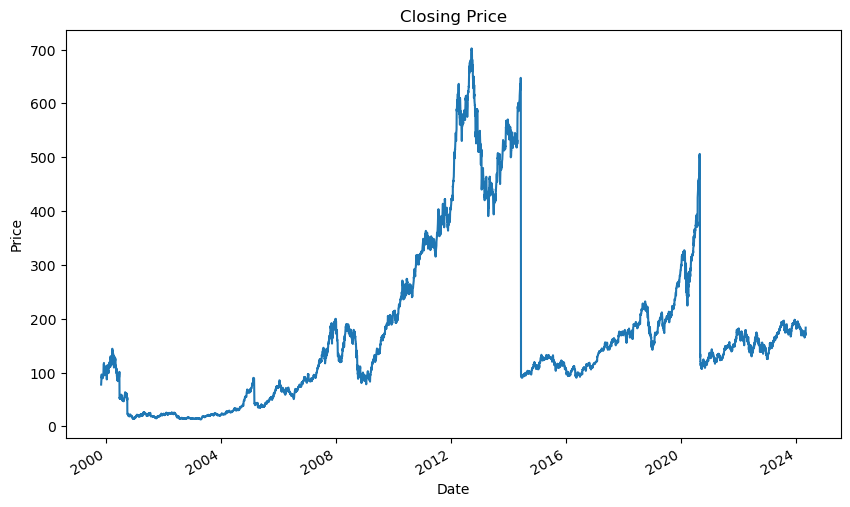

None


>  more stock info
Enter the stock ticker:  tsla
Enter 'table' to display stock data as a table or 'graph' to visualize as a graph:  table


             Open     High    Low  Close  Adj Close      Volume  \
date                                                              
2010-07-06  20.00  20.0000  15.83  16.11   1.074000   6866900.0   
2010-07-02  23.00  23.1000  18.71  19.20   1.280000   5139800.0   
2010-07-01  25.00  25.9200  20.27  21.96   1.464000   8218800.0   
2010-06-30  25.79  30.4192  23.30  23.83   1.588667  17187100.0   
2010-06-29  19.00  25.0000  17.54  23.89   1.592667  18766300.0   

            7. dividend amount  8. split coefficient  
date                                                  
2010-07-06                 0.0                   1.0  
2010-07-02                 0.0                   1.0  
2010-07-01                 0.0                   1.0  
2010-06-30                 0.0                   1.0  
2010-06-29                 0.0                   1.0  
None


In [ ]:


# Configure logging
logging.basicConfig(level=logging.ERROR)

#knowledge base to answer personal finance questions

personal_finance_kb = {
    "budget": "A plan for managing income and expenses.",
    "savings": "Money set aside for future use or emergencies.",
    "investment": "Putting money into assets with the expectation of generating income or profit.",
    "credit score": "A numerical representation of an individual's creditworthiness.",
    "compound interest": "Interest calculated on the initial principal and the accumulated interest from previous periods.",
    "inflation": "A general increase in prices and fall in the purchasing value of money.",
    "retirement planning": "The process of determining retirement income goals and the actions and decisions necessary to achieve those goals.",
    "emergency fund": "A savings account used to cover unexpected expenses or financial emergencies.",
    "debt management": "The process of controlling and repaying debts while minimizing interest costs and fees.",
    "net worth": "The total value of an individual's assets minus their liabilities.",
    "asset allocation": "The strategy of dividing investments among different asset categories to balance risk and reward.",
    "diversification": "The practice of investing in a variety of assets to reduce overall investment risk.",
    "tax planning": "The process of analyzing a financial situation or plan from a tax perspective to minimize tax liability.",
    "insurance": "A contract in which an individual or entity receives financial protection or reimbursement against losses from an insurance company.",
    "estate planning": "The preparation of tasks that serve to manage an individual's asset base in the event of their incapacitation or death.",
    "mortgage": "A loan used to purchase real estate, where the property serves as collateral for the loan.",
    "credit card": "A payment card issued to users (cardholders) to enable the cardholder to pay a merchant for goods and services based on the cardholder's promise to the card issuer to pay them for the amounts plus the other agreed charges.",
    "annual percentage rate (APR)": "The annual rate charged for borrowing or earned through an investment.",
    "401(k)": "A retirement savings plan sponsored by an employer that allows employees to save and invest a portion of their paycheck before taxes are taken out.",
    "individual retirement account (IRA)": "A tax-advantaged investing tool that individuals use to earmark funds for retirement savings.",
    "mutual fund": "An investment vehicle made up of a pool of funds collected from many investors for the purpose of investing in securities such as stocks, bonds, money market instruments, and similar assets.",
    "exchange-traded fund (ETF)": "A type of investment fund and exchange-traded product that is traded on stock exchanges, much like stocks.",
    "bear market": "A condition in which securities prices fall and widespread pessimism causes the stock market's downward spiral to be self-sustaining.",
    "bull market": "A financial market in which prices are rising or are expected to rise.",
    "capital gains": "The profit earned on the sale of an asset or investment.",
    "dividend": "A distribution of a portion of a company's earnings, decided by the board of directors, to a class of its shareholders.",
    "expense ratio": "A measure of what it costs an investment company to operate a mutual fund or exchange-traded fund (ETF).",
    "financial planner": "A qualified investment professional who helps individuals and corporations meet their long-term financial objectives.",
    "risk tolerance": "The degree of variability in investment returns that an investor is willing to withstand in their financial planning.",
    "time value of money": "The concept that money available at the present time is worth more than the identical sum in the future due to its potential earning capacity.",
    "rebalancing": "The process of realigning the weightings of a portfolio of assets by periodically buying or selling assets to maintain the desired level of asset allocation or risk.",
    "dollar-cost averaging": "An investment strategy in which an investor divides up the total amount to be invested across periodic purchases of a target asset in an effort to reduce the impact of volatility on the overall purchase.",
    "financial independence": "The status of having enough income to pay one's living expenses for the rest of one's life without having to be employed or dependent on others."
}

#Chatbot 
def welcome_message():
    print("Welcome to the AI Personal Finance Assistant!")
    print("How can I assist you today?")

def get_user_input():
    user_input = input("> ")
    return user_input.strip()

def preprocess_input(user_input):
    tokens = word_tokenize(user_input)
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stop_words]
    return filtered_tokens
    
#locate word and definition after user input
def search_knowledge_base(tokens):
    for token in tokens:
        if token in personal_finance_kb:
            return personal_finance_kb[token]
    result = ""
    for term, definition in personal_finance_kb.items():
        if any(t in term.split() for t in tokens):
            result += f"{term}: {definition}\n"
    return result.strip()
    
#Formulas

def calculate_compound_interest(principal, rate, time, n):
    try:
        amount = principal * (1 + (rate / n)) ** (n * time)
        return amount
    except Exception as e:
        logging.error(f"Error calculating compound interest: {str(e)}")
        return None

def calculate_simple_interest(principal, rate, time):
    try:
        interest = principal * rate * time
        return principal + interest
    except Exception as e:
        logging.error(f"Error calculating simple interest: {str(e)}")
        return None

def calculate_future_value(present_value, rate, time, n=1):
    try:
        future_value = present_value * (1 + (rate / n)) ** (n * time)
        return future_value
    except Exception as e:
        logging.error(f"Error calculating future value: {str(e)}")
        return None

def calculate_present_value(future_value, rate, time, n=1):
    try:
        present_value = future_value / ((1 + (rate / n)) ** (n * time))
        return present_value
    except Exception as e:
        logging.error(f"Error calculating present value: {str(e)}")
        return None

def calculate_annuity_payment(present_value, rate, time, n=1):
    try:
        periodic_rate = rate / n
        annuity_payment = (present_value * periodic_rate) / (1 - (1 + periodic_rate) ** (-n * time))
        return annuity_payment
    except Exception as e:
        logging.error(f"Error calculating annuity payment: {str(e)}")
        return None

def calculate_mortgage_payment(loan_amount, rate, time):
    try:
        periodic_rate = rate / 12
        num_payments = time * 12
        mortgage_payment = (loan_amount * periodic_rate) / (1 - (1 + periodic_rate) ** (-num_payments))
        return mortgage_payment
    except Exception as e:
        logging.error(f"Error calculating mortgage payment: {str(e)}")
        return None

def calculate_net_worth(assets, liabilities):
    try:
        net_worth = assets - liabilities
        return net_worth
    except Exception as e:
        logging.error(f"Error calculating net worth: {str(e)}")
        return None

def calculate_return_on_investment(gain_from_investment, cost_of_investment):
    try:
        roi = (gain_from_investment - cost_of_investment) / cost_of_investment
        return roi
    except Exception as e:
        logging.error(f"Error calculating return on investment: {str(e)}")
        return None

def get_savings_tip():
    tips = [
        "To save money, consider creating a budget, reducing unnecessary expenses, and setting aside a portion of your income each month.",
        "Automate your savings by setting up automatic transfers from your checking account to a savings account.",
        "Build an emergency fund to cover unexpected expenses and provide financial security.",
        "Take advantage of employer-sponsored retirement plans, such as 401(k)s, to save for your future.",
        "Consider investing in low-cost index funds or exchange-traded funds (ETFs) for long-term growth potential.",
        "Pay off high-interest debt, such as credit card balances, to reduce interest costs and improve your financial health.",
        "Shop around for better rates on insurance, cable, and phone services to reduce monthly bills.",
        "Live below your means and avoid lifestyle inflation as your income increases.",
        "Set financial goals and create a plan to achieve them, whether it's saving for a down payment on a house or planning for retirement.",
        "Educate yourself about personal finance concepts, such as budgeting, investing, and credit management, to make informed financial decisions."
    ]
    return random.choice(tips)

def analyze_sentiment(user_input):
    try:
        sia = SentimentIntensityAnalyzer()
        sentiment_scores = sia.polarity_scores(user_input)
        return sentiment_scores['compound']
    except Exception as e:
        logging.error(f"Error analyzing sentiment: {str(e)}")
        return 0

#Alpha Vanatge API connection

def get_stock_data(symbol):
    api_key = 'WG05Z1HM8W9HLJHB'
    ts = TimeSeries(key=api_key, output_format='pandas')
    
    data, meta_data = ts.get_daily_adjusted(symbol, outputsize='full')
    
    if 'Error Message' in data.to_dict():
        error_message = data.to_dict()['Error Message']
        return f"Error: {error_message}"

#Data visualization
        
    else:        
        data.rename(columns={
            '1. open': 'Open',
            '2. high': 'High',
            '3. low': 'Low',
            '4. close': 'Close',
            '5. adjusted close': 'Adj Close',
            '6. volume': 'Volume'
        }, inplace=True)
        return data, None

def display_stock_table(data):
    print(data.tail())

def display_stock_graph(data, graph_type):
    if graph_type == 'line':
        data['Close'].plot(figsize=(10, 6))
        plt.title('Closing Price')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()
    elif graph_type == 'candlestick':
        latest_data = data.tail(1)
        mc = mpf.make_marketcolors(up='g', down='r')
        s = mpf.make_mpf_style(marketcolors=mc)
        mpf.plot(latest_data, type='candle', volume=True, style=s, figsize=(10, 6))
    else:
        print("Invalid graph type.")

def process_input(user_input):
    tokens = preprocess_input(user_input)
    sentiment_score = analyze_sentiment(user_input)
    
    if any(word in ['hello', 'hi', 'hey'] for word in tokens):
        return "Hello! How can I assist you today?"
    elif any(word in ['goodbye', 'bye', 'see you'] for word in tokens):
        return "Goodbye! Have a great day!"
    elif any(word in ['thank', 'thanks'] for word in tokens):
        return "You're welcome! If you have any more questions, feel free to ask."
    elif any(word in ['compound', 'interest'] for word in tokens):
        try:
            principal = float(input("Enter the principal amount: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the number of years: "))
            n = float(input("Enter the number of times interest is compounded per year: "))
            amount = calculate_compound_interest(principal, rate, time, n)
            if amount:
                return f"The final amount after compound interest is: {amount:.2f}"
            else:
                return "An error occurred while calculating compound interest."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['simple', 'interest'] for word in tokens):
        try:
            principal = float(input("Enter the principal amount: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the time period in years: "))
            interest = calculate_simple_interest(principal, rate, time)
            if interest:
                return f"The final amount after simple interest is: {interest:.2f}"
            else:
                return "An error occurred while calculating simple interest."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['future', 'value'] for word in tokens):
        try:
            present_value = float(input("Enter the present value: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the time period in years: "))
            n = float(input("Enter the number of compounding periods per year: "))
            future_value = calculate_future_value(present_value, rate, time, n)
            if future_value:
                return f"The future value is: {future_value:.2f}"
            else:
                return "An error occurred while calculating future value."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['present', 'value'] for word in tokens):
        try:
            future_value = float(input("Enter the future value: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the time period in years: "))
            n = float(input("Enter the number of compounding periods per year: "))
            present_value = calculate_present_value(future_value, rate, time, n)
            if present_value:
                return f"The present value is: {present_value:.2f}"
            else:
                return "An error occurred while calculating present value."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['annuity', 'payment'] for word in tokens):
        try:
            present_value = float(input("Enter the present value of the annuity: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the time period in years: "))
            n = float(input("Enter the number of payments per year: "))
            annuity_payment = calculate_annuity_payment(present_value, rate, time, n)
            if annuity_payment:
                return f"The annuity payment is: {annuity_payment:.2f}"
            else:
                return "An error occurred while calculating annuity payment."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['mortgage', 'payment'] for word in tokens):
        try:
            loan_amount = float(input("Enter the loan amount: "))
            rate = float(input("Enter the annual interest rate (in decimal form): "))
            time = float(input("Enter the loan term in years: "))
            mortgage_payment = calculate_mortgage_payment(loan_amount, rate, time)
            if mortgage_payment:
                return f"The mortgage payment is: {mortgage_payment:.2f}"
            else:
                return "An error occurred while calculating mortgage payment."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['net', 'worth'] for word in tokens):
        try:
            assets = float(input("Enter the total value of assets: "))
            liabilities = float(input("Enter the total value of liabilities: "))
            net_worth = calculate_net_worth(assets, liabilities)
            if net_worth:
                return f"The net worth is: {net_worth:.2f}"
            else:
                return "An error occurred while calculating net worth."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['return', 'investment', 'roi'] for word in tokens):
        try:
            gain_from_investment = float(input("Enter the gain from investment: "))
            cost_of_investment = float(input("Enter the cost of investment: "))
            roi = calculate_return_on_investment(gain_from_investment, cost_of_investment)
            if roi:
                return f"The return on investment (ROI) is: {roi:.2%}"
            else:
                return "An error occurred while calculating return on investment."
        except ValueError:
            return "Invalid input. Please enter numeric values."
    elif any(word in ['savings', 'tip'] for word in tokens):
        return get_savings_tip()
    
    elif any(word in ['stock', 'quote'] for word in tokens):
        symbol = input("Enter the stock ticker: ")
        data, error = get_stock_data(symbol)
        if error:
            return error
        else:
            display_type = input("Enter 'table' to display stock data as a table or 'graph' to visualize as a graph: ")
            if display_type == 'table':
                display_stock_table(data)
            elif display_type == 'graph':
                graph_type = input("Enter 'line' for a line graph or 'candlestick' for a candlestick chart: ")
                display_stock_graph(data, graph_type.lower())
            else:
                return "Invalid display type."
    else:
        result = search_knowledge_base(tokens)
        if result:
            if sentiment_score >= 0.5:
                return f"Here's what I found about '{user_input}' (positive sentiment detected):\n{result}"
            elif sentiment_score <= -0.5:
                return f"Here's what I found about '{user_input}' (negative sentiment detected):\n{result}"
            else:
                return f"Here's what I found about '{user_input}':\n{result}"
        else:
            return f"I'm sorry, I don't have information on '{user_input}'. Can you please ask something else related to personal finance?"

def main():
    welcome_message()
    while True:
        user_input = get_user_input()
        if user_input.lower() in ['quit', 'exit', 'bye']:
            print("Thank you for using the AI Personal Finance Assistant. Goodbye!")
            break
        response = process_input(user_input)
        print(response)

if __name__ == "__main__":
    main()
    


In [1]:
!pip install alpha_vantage
!pip install matplotlib mplfinance

